In [228]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
from time import perf_counter
import gc

# Part 2

## Question 1
### A matrix representation

In [124]:
def buildTree(S, vol , T, N):
    dt = T / N
    matrix = np.zeros((N + 1, N + 1))
    u = np.e **  (vol * np.sqrt(dt)) # TODO
    d = np.e ** (-vol * np.sqrt(dt)) # TODO

    # Iterate over the lower triangle
    for i in np.arange(N + 1): # iterate over rows
        for j in np.arange(i + 1): # iterate over columns
            # Hint: express each cell as a combination of up and down moves
            matrix[i, j] = S * d ** (i-j) * u ** (j)

    return matrix

In [125]:
sigma = 0.1
S = 80
T =1.
N = 2

print(buildTree(S, sigma, T, N))

[[80.          0.          0.        ]
 [74.53851387 85.86165282  0.        ]
 [69.44987563 80.         92.15279281]]


### Calculating the option value

In [218]:
def valueOptionMatrix(tree , T, r , K, vol, N ):
    dt = T / N

    u = np.e **  (vol * np.sqrt(dt)) # TODO
    d = np.e ** (-vol * np.sqrt(dt)) # TODO

    p = (np.e ** (r*dt) - d)/(u - d) # TODO

    columns = tree.shape[1]
    rows = tree.shape[0]

    # Walk backward , we start in last row of the matrix

    # Add the payoff function in the last row
    for c in np.arange(columns):
        S = tree[rows-1, c] # value in the matrix
        tree[rows-1, c] = max(0, S - K) # TODO
    # print( tree )

    # For all other rows , we need to combine from previous rows
    # We walk backwards , from the last row to the first row
    for i in np.arange(rows-1)[::-1]:
        for j in np.arange(i + 1):
            down = tree[i+1, j]
            up = tree[i + 1, j + 1]
            tree[i , j ] = (np.e**(-r*dt)) * (p * up + (1 - p) * down) # TODO
    return tree

In [219]:
sigma = 0.2
S = 100
T=1.
N=50

K = 99
r = 0.06

tree = buildTree(S, sigma, T, N)
option_value_tree = valueOptionMatrix( tree , T, r , K, sigma, N)
print(f'Option Value = {option_value_tree[0, 0]}')
option_value_tree

Option Value = 11.546434850755071


array([[ 11.54643485,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  9.60391567,  13.40897969,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  7.86799392,  11.26670021,  15.46463735, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 289.94017906,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 278.98144103,
        300.9727274 ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 268.32487093,
        289.70286396, 312.32503788]])

## Option Value Approximation Convergence

In [227]:
def get_option_value(N):
    _sigma = 0.2
    _S = 100
    _T=1.
    _# N=50

    _K = 99
    _r = 0.06

    _tree = buildTree(_S, _sigma, _T, N)
    return valueOptionMatrix( _tree , _T, _r , _K, _sigma, N )[0, 0]

NN = 600 ; _starting_n = 3
values = np.zeros((NN, 3))
for n in tqdm(range(_starting_n, NN)):
    _st = perf_counter()
    values[n, 0] = n
    values[n, 1] = get_option_value(n)
    values[n, 2] = perf_counter() - _st

100%|██████████| 597/597 [00:46<00:00, 12.91it/s] 


In [229]:
get_option_value(40)

11.542396744755136

Option Value with N(600) = 11.543449000280722
Option Value with N(50) = 11.546990631984006
Difference = -0.023593770547710946


,Option_Value,Execution_Time
3.0,12.105041,0.000213
4.0,11.221167,0.000068
5.0,11.877161,0.000082
6.0,11.349620,0.000099
7.0,11.779019,0.000115
...,...,...
595.0,11.543405,0.226699
596.0,11.546752,0.231325
597.0,11.543427,0.231849
598.0,11.546738,0.229034


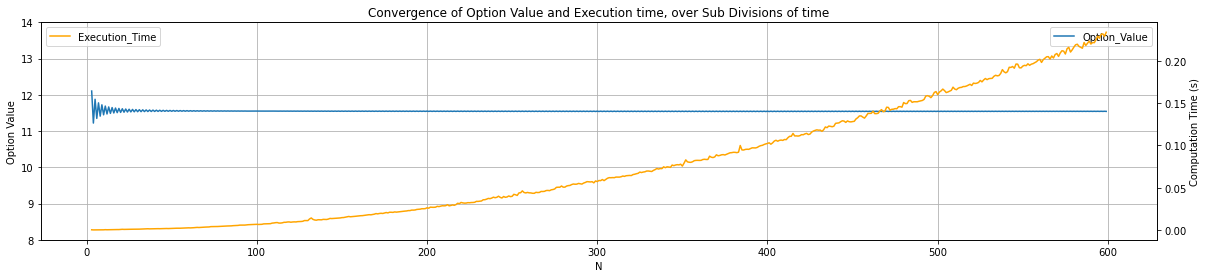

In [231]:
_results_df = pd.DataFrame(values[_starting_n:, 1:], columns=['Option_Value', 'Execution_Time'] , index=values[_starting_n:, 0])
# print(_results_df)

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

_results_df.Option_Value.plot(figsize=(20,4), ylim=(8,14), ax=ax_left, xlabel='N', ylabel='Option Value', legend='Option Value - USD',
                              title='Convergence of Option Value and Execution time, over Sub Divisions of time', grid=True)
_results_df.Execution_Time.plot(ax=ax_right, color='orange', ylabel='Computation Time (s)', legend='Computation Time')

print(f'Option Value with N({NN}) = {_results_df.iloc[-1].Option_Value}')
print(f'Option Value with N(50) = {_results_df.iloc[49].Option_Value}')
print(f'Difference = {_results_df.iloc[-1].Option_Value - _results_df.iloc[50].Option_Value}')
_results_df

### Plotting

In [ ]:
# Play around with different ranges of N and step sizes .
N = np.arange(1,300)

# Calculate the option price for the correct parameters
optionPriceAnalytical = 0 # TODO

# calculate option price for each n in N
for n in N:
    treeN = buildTree (...) # TODO
    priceApproximatedly = valueOption ( . . . ) # TODO

# use matplotlib to plot the analytical value
# and the approximated value for each n